MICE: Multiple Imputation through Chained Equations
===================================================

This notebook demonstrates the statsmodels MICE implementation.

The CHAIN data set, analyzed below, has also been used to illustrate the R mi package.  Section 4 of [this paper](http://www.jstatsoft.org/v45/i02/paper) describes an analysis of the data set conducted in R

In [1]:
import sys
sys.path.insert(0, "/projects/57433cc7-78ab-4105-a525-ba087aa3e2fc/statsmodels-mice2")
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.mice import mice
import matplotlib.pyplot as plt

First we load the data and do a bit of cleanup.

In [2]:
data = pd.read_csv("chain.csv")
del data["Unnamed: 0"]
data.columns = [x.replace(".W1", "") for x in data.columns]
print data.head()

       h39b  age  c28        pcs  mcs37  b05  haartadhere
0  9.996477   29    5  34.182713      1    4            1
1  0.000000   38    5  58.098125      0    5            2
2       NaN   47    6  21.876003      0    1            1
3       NaN   53    2  18.675938      0    5            0
4  7.090077   42    2  54.099964      0    4            1


We can make some simple graphs to visualize the missing data patterns.  The colored cells correspond to missing values.

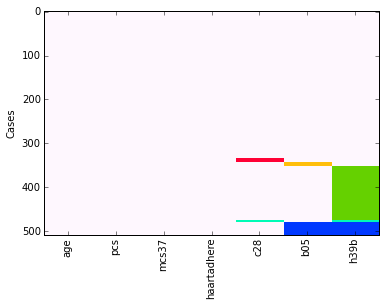

In [3]:
imp = mice.MICEData(data)
_ = imp.plot_missing_pattern()

We can exclude the complete cases and completely observed variables in order to make it easier to see the different missing data patterns.

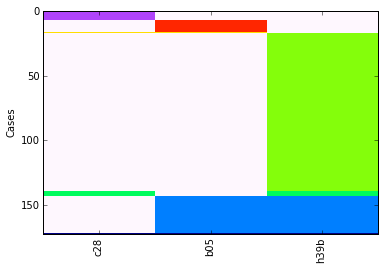

In [4]:
_ = imp.plot_missing_pattern(hide_complete_rows=True, hide_complete_columns=True)

Here is a simple example of how to coduct an analysis using MICE.  The formula specifies the "analysis model", which is the model we primarily want to fit and interpret.  Additional "imputation models" are used to impute missing values of each variable that has missing values.  In this example we use defaults, so that all the imputation models use ordinary least squares, with each variable imputed from a model in which every other variable has a main effect.

In [5]:
mi = mice.MICE("h39b ~ age + c28 + pcs + mcs37 + b05 + haartadhere", sm.OLS, imp)
result = mi.fit(20, 5)
print(result.summary())

                           Results: MICE
Method:                    MICE       Sample size:           508  
Model:                     OLS        Scale                  18.13
Dependent variable:        h39b       Num. imputations       5    
------------------------------------------------------------------
             Coef.  Std.Err.    t    P>|t|   [0.025  0.975]  FMI  
------------------------------------------------------------------
Intercept   15.3742   1.5637  9.8319 0.0000 12.3094 18.4390 0.1145
age         -0.0871   0.0274 -3.1767 0.0015 -0.1408 -0.0334 0.2460
c28         -0.3437   0.1029 -3.3399 0.0008 -0.5455 -0.1420 0.1000
pcs         -0.0294   0.0227 -1.2924 0.1962 -0.0739  0.0152 0.4629
mcs37        1.3717   0.5243  2.6163 0.0089  0.3441  2.3994 0.3159
b05         -1.1323   0.1592 -7.1149 0.0000 -1.4443 -0.8204 0.1722
haartadhere -1.0442   0.2547 -4.0991 0.0000 -1.5435 -0.5449 0.2403



We can assess how well the imputed values match the observed values by looking at histograms of the marginal distributions.  These histograms show the imputed values from the final imputed data set together with the observed values.

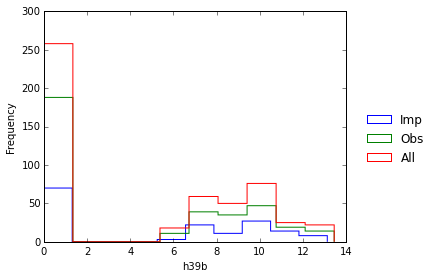

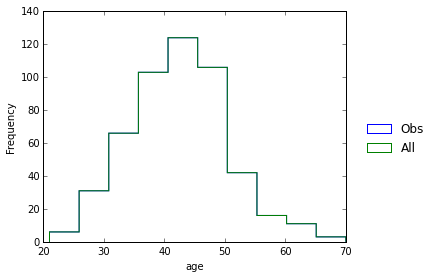

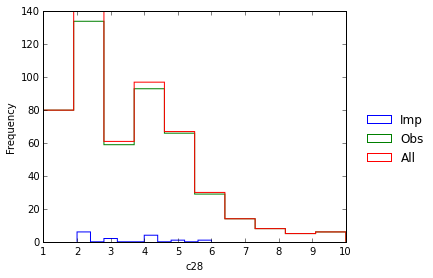

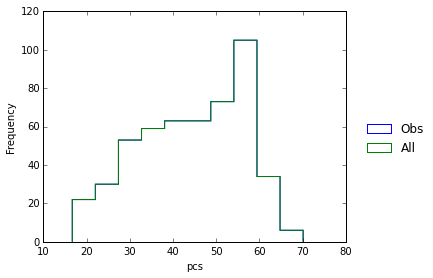

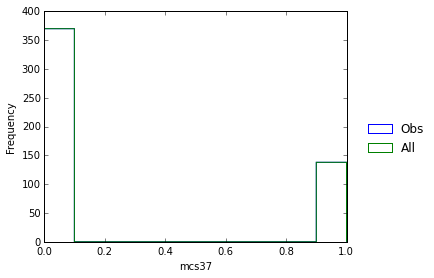

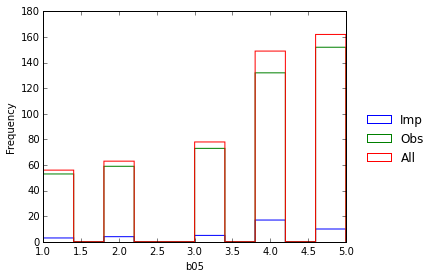

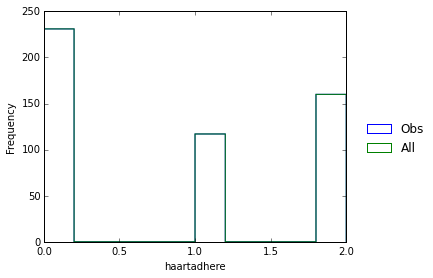

In [6]:
plt.clf()
for col in data.columns:
    plt.figure()
    ax = plt.axes()
    _ = imp.plot_imputed_hist(col, ax=ax, )

We can also look at marginal relationships between each variable and the outcome variable  The `plot_bivariate` method colors the points accorording to whether they are missing or observed on each variable in the scatterplot.  We hope to see the same trends and degree of scatter among the observed and imputed points.

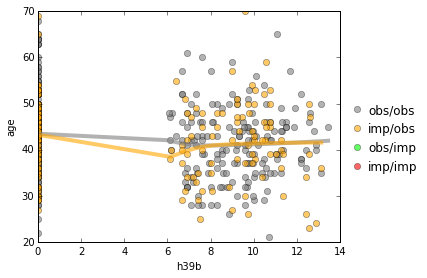

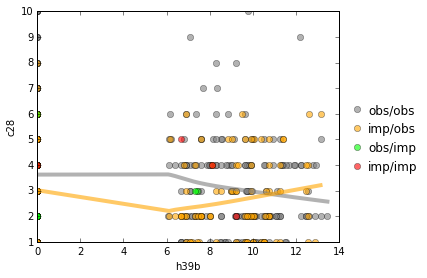

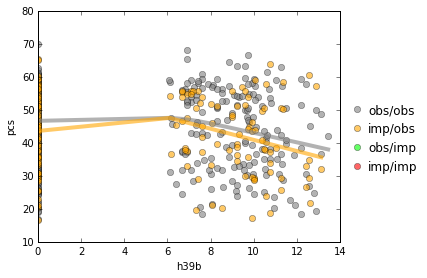

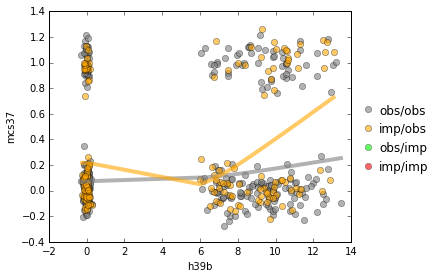

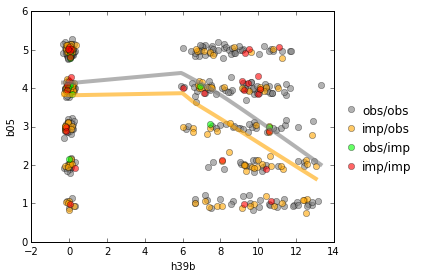

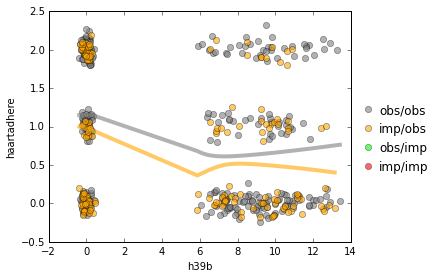

In [7]:
plt.clf()
jitter = {"age": None, "c28": None, "pcs": None, "mcs37": 0.1, 
          "b05": 0.1, "haartadhere": 0.1}
for col in data.columns:
    if col == "h39b": 
        continue
    _ = imp.plot_bivariate("h39b", col, jitter=jitter[col])

Another useful diagnostic plot is to look at the fitted values from the imputation model plotted against either the observed or imputed values.  The imputed values are taken from the final imputed data set.  We hope to see similar trends and similar degrees of scatter in the observed and imputed values.  This plot can be made for any of the variables in the data set.  Here we show the result for h39b since that is the variable with the greatest number of missing values in the data set.

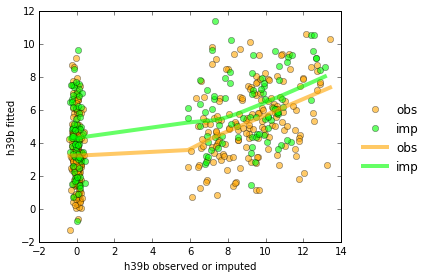

In [8]:
plt.clf()
_ = imp.plot_fit_obs("h39b")